### Ejercicio 2: \( f(x) = \arctan(x) \), con \( x_0 = 1 \)

#### Serie de Taylor (orden 3)

La serie de Taylor centrada en \( x_0 = 1 \) es:

\[
f(x) \approx T_3(x) = f(1) + f'(1)(x - 1) + \frac{f''(1)}{2}(x - 1)^2 + \frac{f^{(3)}(1)}{6}(x - 1)^3
\]

Calculando:

- \( f(1) = \arctan(1) = \frac{\pi}{4} \)
- \( f'(x) = \frac{1}{1 + x^2} \Rightarrow f'(1) = \frac{1}{2} \)
- \( f''(x) = \frac{-2x}{(1 + x^2)^2} \Rightarrow f''(1) = -0.5 \)
- \( f^{(3)}(x) = \frac{6x^2 - 2}{(1 + x^2)^3} \Rightarrow f^{(3)}(1) = \frac{4}{8} = 0.5 \)

\[
T_3(x) = \frac{\pi}{4} + \frac{1}{2}(x - 1) - \frac{1}{4}(x - 1)^2 + \frac{1}{12}(x - 1)^3
\]

---

#### Polinomio de Lagrange (orden 2, usando los puntos \( x = 0.8,\ 1.0,\ 1.2 \))

Usamos la misma fórmula general:

\[
L_2(x) = \sum_{i=0}^{2} y_i \cdot \ell_i(x)
\]
\[
\ell_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{2} \frac{x - x_j}{x_i - x_j}
\]

Donde:
- \( x_0 = 0.8,\quad x_1 = 1.0,\quad x_2 = 1.2 \)
- \( y_0 = \arctan(0.8),\quad y_1 = \arctan(1.0),\quad y_2 = \arctan(1.2) \)

\[
L_2(x) = \arctan(0.8) \cdot \frac{(x - 1.0)(x - 1.2)}{(0.8 - 1.0)(0.8 - 1.2)} +
\arctan(1.0) \cdot \frac{(x - 0.8)(x - 1.2)}{(1.0 - 0.8)(1.0 - 1.2)} +
\arctan(1.2) \cdot \frac{(x - 0.8)(x - 1.0)}{(1.2 - 0.8)(1.2 - 1.0)}
\]

---

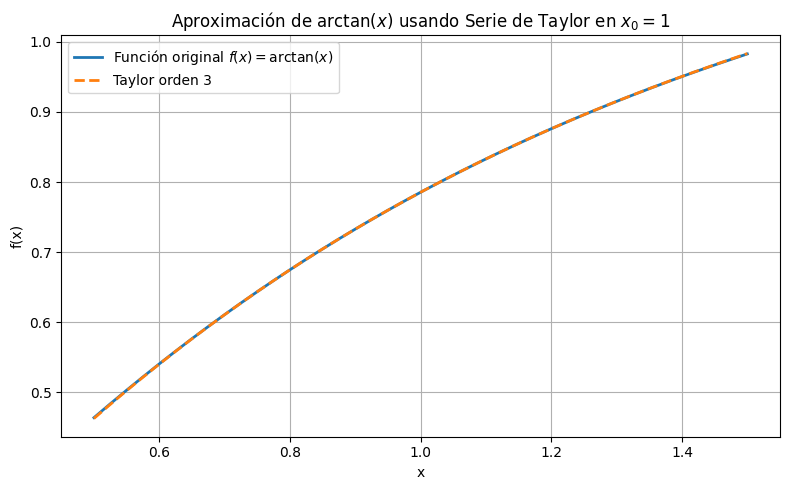

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan

# Dominio
x = np.linspace(0.5, 1.5, 400)

# Derivadas en x = 1
f0 = atan(1)                      # f(1)
f1 = 1 / (1 + 1**2)               # f'(1)
f2 = -2 / (1 + 1**2)**2           # f''(1)
f3 = (6*1**2 - 2) / (1 + 1**2)**3 # f'''(1)

# Serie de Taylor orden 3 en x = 1
taylor_f2 = f0 + f1 * (x - 1) + f2/2 * (x - 1)**2 + f3/6 * (x - 1)**3

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, np.arctan(x), label='Función original $f(x) = \\arctan(x)$', linewidth=2)
plt.plot(x, taylor_f2, '--', label='Taylor orden 3', linewidth=2)
plt.title("Aproximación de $\\arctan(x)$ usando Serie de Taylor en $x_0 = 1$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


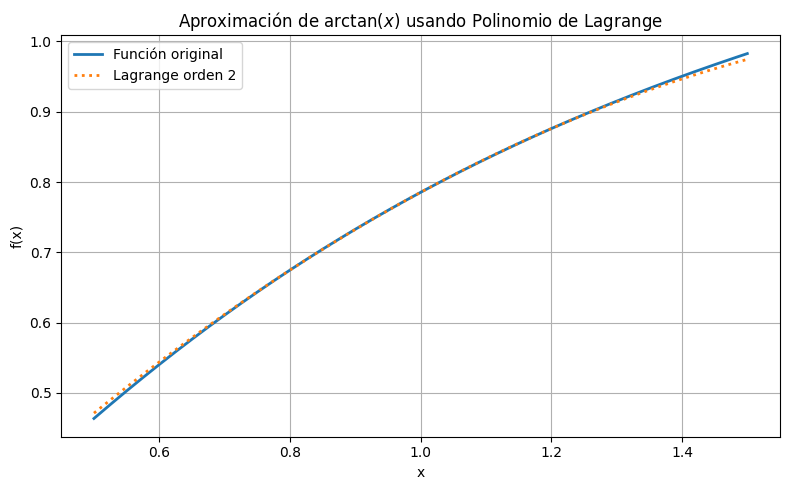

In [3]:
# Nodos de interpolación cerca de x=1
x_nodes2 = np.array([0.8, 1.0, 1.2])
y_nodes2 = np.arctan(x_nodes2)

# Reutilizamos función lagrange_poly()
def lagrange_poly(x_eval, x_vals, y_vals):
    total = np.zeros_like(x_eval)
    for i in range(len(x_vals)):
        xi, yi = x_vals[i], y_vals[i]
        li = np.ones_like(x_eval)
        for j in range(len(x_vals)):
            if i != j:
                li *= (x_eval - x_vals[j]) / (xi - x_vals[j])
        total += yi * li
    return total

lagrange_f2 = lagrange_poly(x, x_nodes2, y_nodes2)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, np.arctan(x), label='Función original', linewidth=2)
plt.plot(x, lagrange_f2, ':', label='Lagrange orden 2', linewidth=2)
plt.title("Aproximación de $\\arctan(x)$ usando Polinomio de Lagrange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


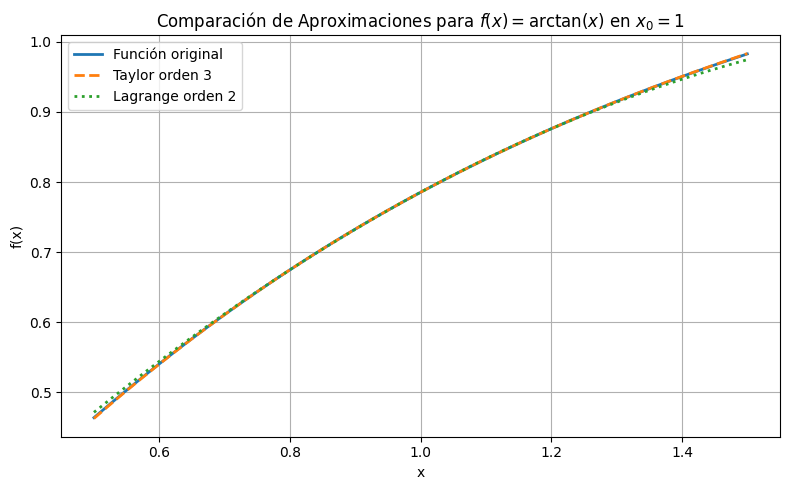

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(x, np.arctan(x), label='Función original', linewidth=2)
plt.plot(x, taylor_f2, '--', label='Taylor orden 3', linewidth=2)
plt.plot(x, lagrange_f2, ':', label='Lagrange orden 2', linewidth=2)
plt.title("Comparación de Aproximaciones para $f(x) = \\arctan(x)$ en $x_0 = 1$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()